In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipaddress

In [3]:
rawData = pd.read_csv('Google_hangouts_removeBadPacketsReservedIP.csv')

In [4]:
#print(rawData)
print("(rows,columns):",rawData.shape)

(rows,columns): (10183, 87)


In [5]:
# Get np array by columns
X = rawData.iloc[:,:86].values
Y = rawData.iloc[:,86].values.reshape((rawData.shape[0],1))
m = rawData.shape[0]
# Total length of flow in both direction
X_total_length_flow = np.array(rawData.loc[:,['TotLen Fwd Pkts','TotLen Bwd Pkts','Category']])
# Category and AppProtocol
X_category_AppProtocol = np.array(rawData.loc[:,['Category','App_protocol']])
# 5 tuples (IP,Port,Protocol)
X_five_tuples = np.array(rawData.loc[:,['Src IP','Src Port','Dst IP','Dst Port','Protocol']])
# Src IP and Dst IP
X_src_dst_IP = np.array(rawData.loc[:,['Src IP','Dst IP']])
#print(X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')])

#Scr IP, Dst IP, Category, App Protocol, Web Service
X_ip_label = np.array(rawData.loc[:,['Src IP','Dst IP','Category','App_protocol','Web_service']])

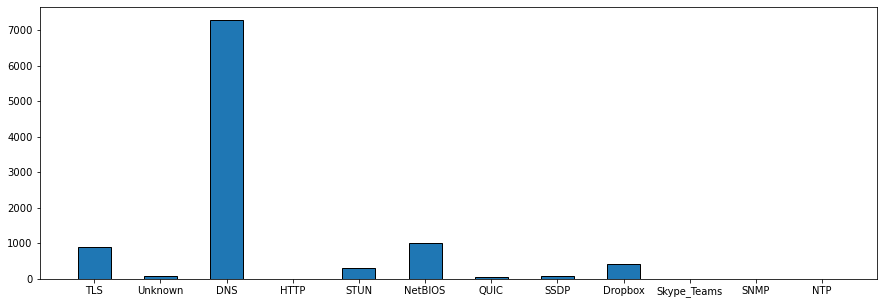

In [6]:
# plot App_protocol
X_AppProtocol = X_category_AppProtocol[:,1].reshape(m,1)
X_appProtocol_labels = np.unique(X_AppProtocol)
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_AppProtocol,rwidth=0.5,bins=np.arange(-0.5,len(X_appProtocol_labels)),edgecolor='black')

plt.show()

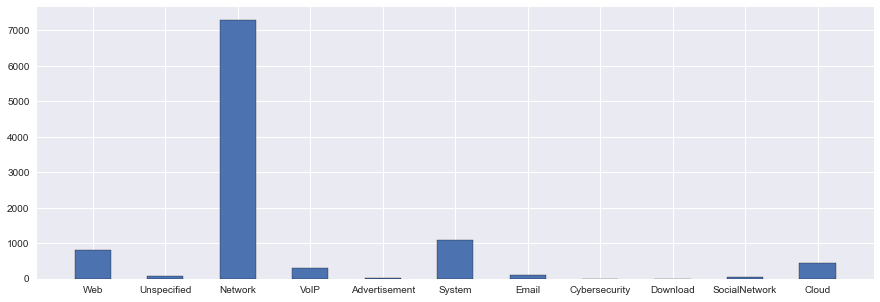

In [7]:
# plot category
plt.style.use('seaborn')

X_category = X_category_AppProtocol[:,0]
X_category = X_category.reshape(X_category.shape[0],1)
x_category_labels = np.unique(X_category)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_category,rwidth=0.5,bins=np.arange(-0.5,len(x_category_labels)),edgecolor='black')

plt.show()

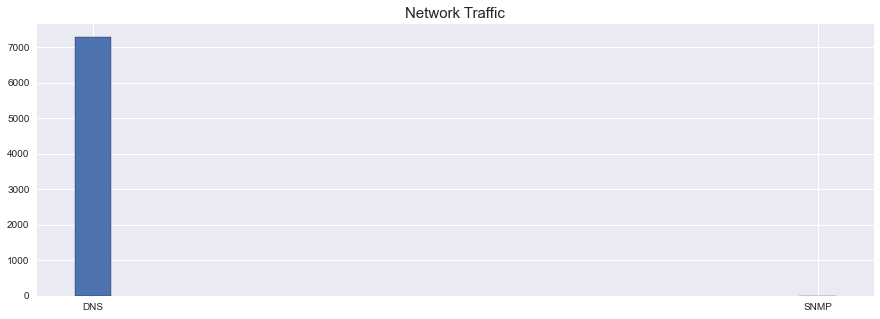

In [8]:
# plot what app protocols the network traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Network')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)



fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.05,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Network Traffic",fontsize=15)
plt.show()

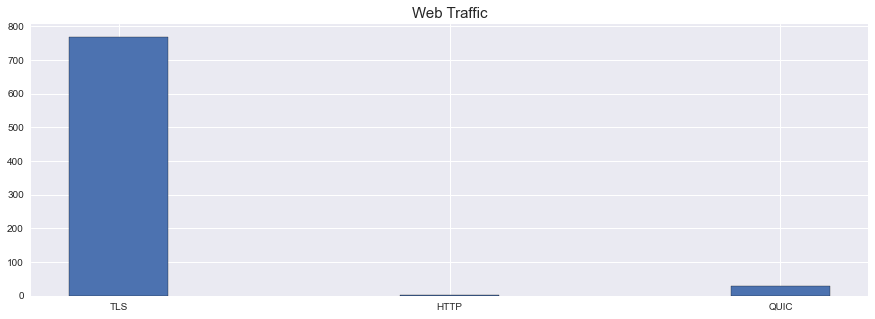

In [9]:
# plot what app protocols the web traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)


fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.3,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Web Traffic",fontsize=15)
plt.show()

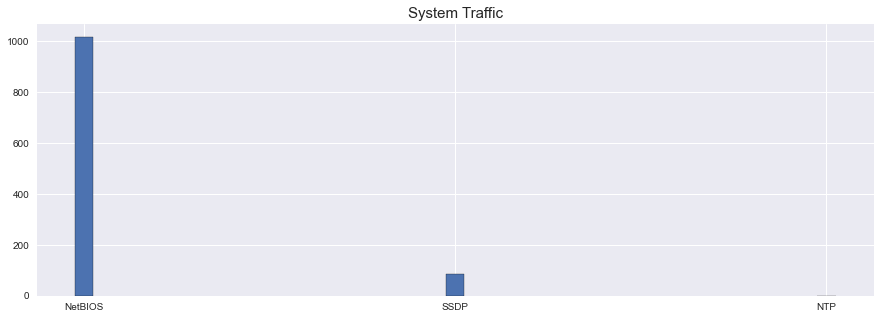

In [10]:
# plot what app protocols the System traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'System')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)



fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.05,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("System Traffic",fontsize=15)
plt.show()

In [11]:
# normalizing total length of forward and backward flows
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]

m = X_network_length_flow.shape[0]
X_network_length_flow_norm_forward =  X_network_length_flow[:,0] / X_network_length_flow[:,0].max(axis=0)
X_network_length_flow_norm_forward = X_network_length_flow_norm_forward.reshape(m,1)

X_network_length_flow_norm_backward = X_network_length_flow[:,1] / X_network_length_flow[:,1].max(axis=0)
X_network_length_flow_norm_backward = X_network_length_flow_norm_backward.reshape(m,1)

X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm_forward,X_network_length_flow_norm_backward),axis=1)
X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm,X_network_length_flow[:,2].reshape(m,1)),axis=1)

(7000, 3)


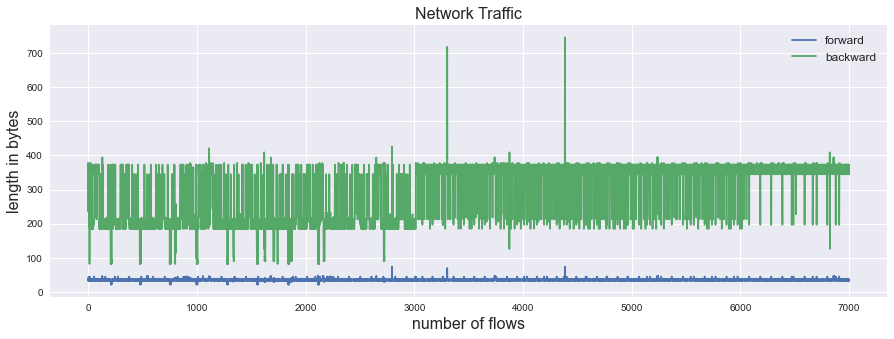

In [12]:
# plot total length of forward and backward flow in network traffic
#X_network_length_flow = X_network_length_flow_norm
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')][:7000]
print(X_network_length_flow.shape)
flow = ['forward','backward']

fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_network_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Network Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

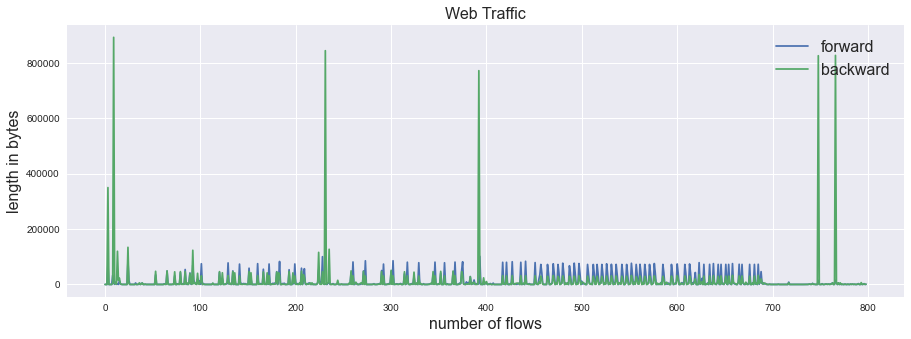

In [13]:
# plot total length of forward and backward flow in web traffic
X_web_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Web')]
fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_web_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Web Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=16 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### Reserved IP address space
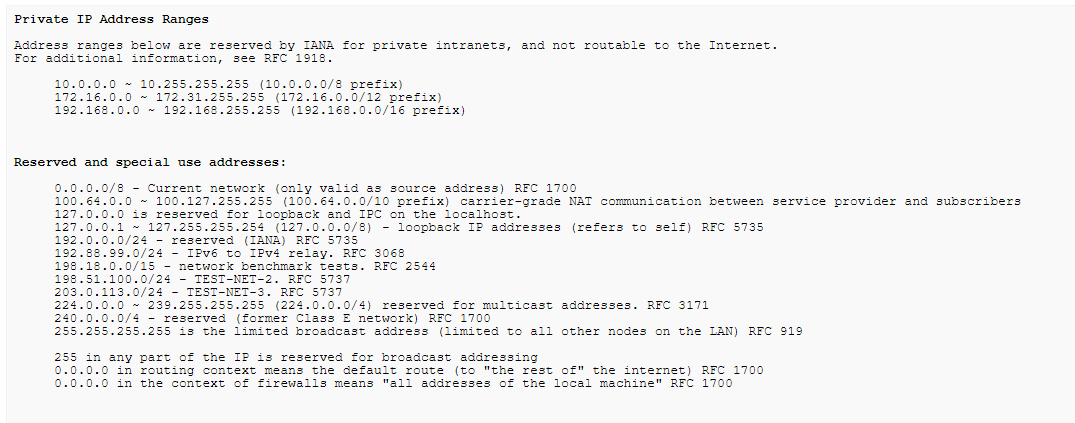

In [14]:
# Analayzing the network at social level - Popularity of hosts
x_src_ip_port = X_five_tuples[:,:2]
X_dst_ip_port = X_five_tuples[:,2:4]
                                 
count, unique = np.unique(X_src_dst_IP,return_counts=True)
unique = unique.reshape(unique.shape[0],1)
count = count.reshape(count.shape[0],1)
X_src_des_ip_count = np.concatenate((unique,count),axis=1)
X_src_des_ip_count = X_src_des_ip_count[X_src_des_ip_count[:,0].argsort()]

In [15]:
graph = {}
for row in X_src_dst_IP:
    if row[0] not in graph:
        graph[row[0]] = {'in':set(),'out':set()}
        
    if row[1] not in graph[row[0]]['out']:
        graph[row[0]]['out'].add(row[1])
    
    if row[1] not in graph:
        graph[row[1]] = {'in':set(),'out':set()}
    
    if row[0] not in graph[row[1]]['in']:
        graph[row[1]]['in'].add(row[0])

X_src_des_degree_count = []
for row in X_src_des_ip_count:
    if row[1] in graph:
        r = np.insert(row,1,len(graph[row[1]]['in']))
        r = np.insert(r,2,len(graph[row[1]]['out']))
        r = np.insert(r,3,len(graph[row[1]]['in']) + len(graph[row[1]]['out']))
        X_src_des_degree_count.append(r)
        
# 0: occurrence, 1: in_degree, 2: out_degree, 3: total degree, 4: ip     
X_src_des_degree_count = np.array(X_src_des_degree_count)
# sort by total degree
X_src_des_degree_count = X_src_des_degree_count[X_src_des_degree_count[:,3].argsort()]
# sort by occurrence
X_src_des_occurrence_count = X_src_des_degree_count[X_src_des_degree_count[:,0].argsort()]

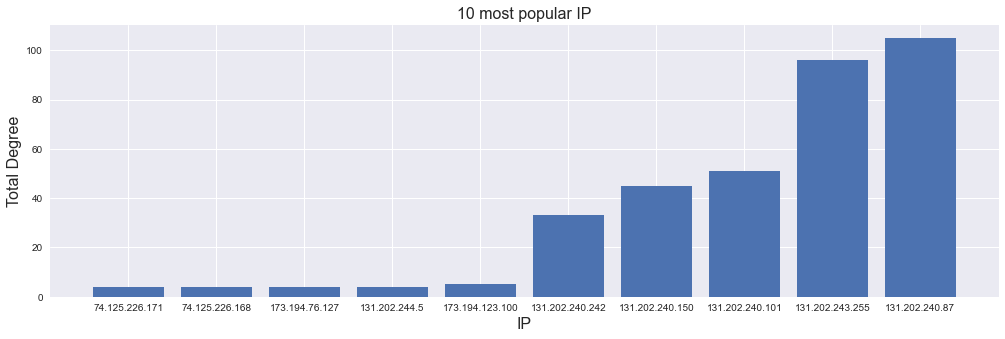

[[4 2 2 4 '74.125.226.171']
 [45 2 2 4 '74.125.226.168']
 [103 2 2 4 '173.194.76.127']
 [4780 4 0 4 '131.202.244.5']
 [16 4 1 5 '173.194.123.100']
 [100 11 22 33 '131.202.240.242']
 [3401 6 39 45 '131.202.240.150']
 [4703 5 46 51 '131.202.240.101']
 [1532 96 0 96 '131.202.243.255']
 [529 34 71 105 '131.202.240.87']]


In [16]:
# dimension
degree_count_m = X_src_des_degree_count.shape[0]
degree_count_n = X_src_des_degree_count.shape[1]

# Get 10 most popular IPs
X_src_des_degree_count_10 = X_src_des_degree_count[degree_count_m - 10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_degree_count_10[:,4],X_src_des_degree_count_10[:,3],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Total Degree',fontsize=16)
plt.title('10 most popular IP',fontsize=16)
plt.show()
print(X_src_des_degree_count_10)

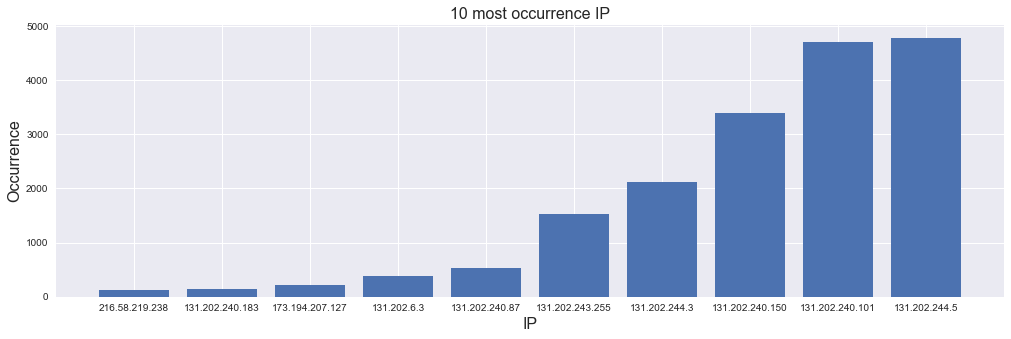

In [17]:
X_src_des_occurrence_count_10 = X_src_des_occurrence_count[degree_count_m-10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_occurrence_count_10[:,4],X_src_des_occurrence_count_10[:,0],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Occurrence',fontsize=16)
plt.title('10 most occurrence IP',fontsize=16)
plt.show()

In [18]:
# show web service counts with 10 most popular IP
ips_popular = X_src_des_degree_count_10[:,4]
for ip in ips_popular:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a_category,counts = np.unique(a[:,4],return_counts=True)
    total = np.sum(counts)
    longest_length = max(len(x) for x in a_category)
    print("Web service count with IP = {}".format(ip))
    for i in range(len(counts)):
        print("{}: {:{pad}} {}%".format(a_category[i],counts[i],round((counts[i] / total) * 100,2),pad=longest_length-len(a_category[i])+5))
    print()
    

Web service count with IP = 74.125.226.171
Unknown:     4 100.0%

Web service count with IP = 74.125.226.168
Google:      3 6.67%
Unknown:    42 93.33%

Web service count with IP = 173.194.76.127
GoogleHangoutDuo:    99 96.12%
Unknown:              4 3.88%

Web service count with IP = 131.202.244.5
Cybersec:        2 0.04%
GMail:          67 1.4%
Google:       2613 54.67%
GooglePlus:   2000 41.84%
Microsoft:       3 0.06%
Skype_Teams:     6 0.13%
Unknown:        89 1.86%

Web service count with IP = 173.194.123.100
Google:     11 68.75%
Unknown:     5 31.25%

Web service count with IP = 131.202.240.242
GMail:       8 8.0%
Google:     19 19.0%
SMBv1:       2 2.0%
Unknown:    71 71.0%

Web service count with IP = 131.202.240.150
GMail:              115 3.38%
Google:            1666 48.99%
GoogleHangoutDuo:   112 3.29%
GooglePlus:        1242 36.52%
SMBv1:               21 0.62%
SMBv23:               1 0.03%
Skype_Teams:          2 0.06%
Skype_TeamsCall:      1 0.03%
Unknown:            2

In [19]:
# show category counts with 10 most occurrence IP
ips_occurrence = X_src_des_occurrence_count_10[:,4]
for ip in ips_occurrence:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a_category,counts = np.unique(a[:,4],return_counts=True)
    total = np.sum(counts)
    longest_length = max(len(x) for x in a_category)
    print("Web service count with IP = {}".format(ip))
    for i in range(len(counts)):
        print("{}: {:{pad}} {}%".format(a_category[i],counts[i],round((counts[i] / total) * 100,2),pad=longest_length-len(a_category[i])+5))
    print()

Web service count with IP = 216.58.219.238
Google:        51 41.13%
GooglePlus:    20 16.13%
Unknown:       53 42.74%

Web service count with IP = 131.202.240.183
Unknown:   149 100.0%

Web service count with IP = 173.194.207.127
GoogleHangoutDuo:   213 100.0%

Web service count with IP = 131.202.6.3
Cybersec:       2 0.51%
GMail:         13 3.32%
Google:       234 59.85%
GooglePlus:   130 33.25%
Microsoft:      1 0.26%
Unknown:       11 2.81%

Web service count with IP = 131.202.240.87
Cybersec:            14 2.65%
GMail:               10 1.89%
Google:             117 22.12%
GoogleHangoutDuo:    28 5.29%
GooglePlus:           5 0.95%
Microsoft:           12 2.27%
Unknown:            339 64.08%
YouTube:              4 0.76%

Web service count with IP = 131.202.243.255
SMBv1:      80 5.22%
Unknown:  1452 94.78%

Web service count with IP = 131.202.244.3
Cybersec:       8 0.38%
GMail:         36 1.7%
Google:      1188 56.09%
GooglePlus:   844 39.85%
Microsoft:      4 0.19%
Unknown:      

In [20]:
ips = set()
ips.update(ips_popular)
ips.update(ips_occurrence)

total = []
for ip in ips:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a1 = a[:,:2]
    for i in a1:
        if i[0] != ip and not i[0].startswith('131.202'):
            total.append(i[0])
        elif i[1] != ip and not i[1].startswith('131.202'):
            total.append(i[1])
        
    
total = np.array(total)
total = np.unique(total)

In [21]:
# Google IP
selected_ip = {}
selected_ip['173.194'] = []
selected_ip['74.125'] = []
selected_ip['216.58'] = []
for ip in total:
    if ip.startswith('173.194'):
        selected_ip['173.194'].append(ip)
    elif ip.startswith('74.125'):
        selected_ip['74.125'].append(ip)
    elif ip.startswith('216.58'):
        selected_ip['216.58'].append(ip)

print(selected_ip)

{'173.194': ['173.194.113.152', '173.194.121.53', '173.194.123.1', '173.194.123.100', '173.194.123.101', '173.194.123.102', '173.194.123.103', '173.194.123.104', '173.194.123.105', '173.194.123.107', '173.194.123.108', '173.194.123.110', '173.194.123.111', '173.194.123.117', '173.194.123.118', '173.194.123.119', '173.194.123.121', '173.194.123.123', '173.194.123.124', '173.194.123.32', '173.194.123.36', '173.194.123.38', '173.194.123.54', '173.194.123.6', '173.194.123.64', '173.194.123.66', '173.194.123.67', '173.194.123.7', '173.194.123.71', '173.194.123.72', '173.194.123.73', '173.194.123.78', '173.194.123.8', '173.194.123.86', '173.194.123.96', '173.194.123.97', '173.194.123.98', '173.194.123.99', '173.194.204.189', '173.194.207.127', '173.194.210.188', '173.194.73.189', '173.194.76.127'], '74.125': ['74.125.134.188', '74.125.136.94', '74.125.198.94', '74.125.22.188', '74.125.22.189', '74.125.226.161', '74.125.226.162', '74.125.226.163', '74.125.226.164', '74.125.226.165', '74.125.2